In [1]:
import geopandas
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Path to the file | Ruta al archivo

data_folder = Path("D:/paper_sri") / "Shapefile"

In [3]:
# Open the file | Abrimos el archivo

data = geopandas.read_file(data_folder / "sri.shp")

In [4]:
data.columns

Index(['X1__H', 'X1', 'UNQ', 'X21_cn_', 'X21_sm_', 'X21_luf', 'X00cnt_',
       'X00sm_p', 'X00luef', 'slopbsq', 'slpcrp0', 'slpgrss', 'slop_cn',
       'slopLf0', 'slpSm00', 'bosque', 'prp_bsq', 'p_urbn1', 'p_peri1',
       'p_rurl1', 'histo10', 'histo11', 'histo12', 'histo13', 'histo21',
       'histo22', 'histo23', 'histo30', 'total', 'p_urb20', 'p_per20',
       'p_rrl20', 'ch_prop_u', 'ch_prop_p', 'ch_prop_r', 'ai1', 'ai2', 'ai3',
       'fin1', 'fin2', 'fin3', 'ag_urb', 'ag_p', 'ag_r', 'geometry'],
      dtype='object')

In [9]:
import numpy as np
import seaborn as sns

Pearson correlation coefficient matrix for each independent variable: 
             slopbsq   slop_cn   slopLf0   slpSm00   prp_bsq    ag_urb  \
slopbsq    1.000000 -0.049039  0.020054  0.014403 -0.180367  0.088060   
slop_cn   -0.049039  1.000000 -0.156469  0.774006 -0.501122 -0.331777   
slopLf0    0.020054 -0.156469  1.000000 -0.058719  0.096232  0.154121   
slpSm00    0.014403  0.774006 -0.058719  1.000000 -0.462705 -0.317165   
prp_bsq   -0.180367 -0.501122  0.096232 -0.462705  1.000000  0.165133   
ag_urb     0.088060 -0.331777  0.154121 -0.317165  0.165133  1.000000   
ag_p      -0.010851  0.007891  0.035132  0.032613  0.008325 -0.014282   
ag_r       0.031842 -0.032471  0.007092 -0.005888 -0.037340  0.196013   
ch_prop_u  0.030792  0.001466  0.028029  0.265562 -0.070883 -0.007796   
ch_prop_p -0.006149  0.003554  0.012643  0.063111 -0.023485 -0.030317   
ch_prop_r -0.026762 -0.003999 -0.039188 -0.273068  0.078770  0.034437   

               ag_p      ag_r  ch_prop_u  ch_prop_p

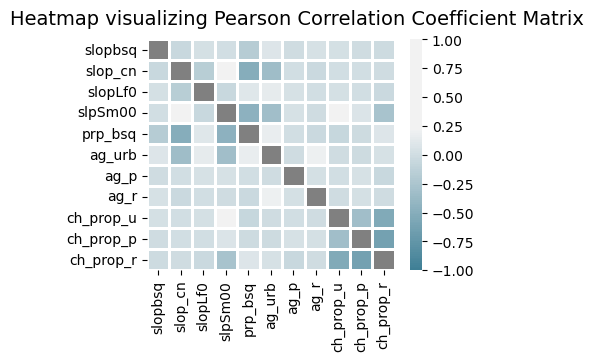

In [10]:
# Visualizing multicollinearity between independent features using a heatmap  
  
corr = data[ ['slopbsq', 'slop_cn', 'slopLf0', 'slpSm00','prp_bsq','ag_urb', 'ag_p', 'ag_r', 'ch_prop_u', 'ch_prop_p', 'ch_prop_r' ]].corr()  
print('Pearson correlation coefficient matrix for each independent variable: \n', corr)  
  
# Masking the diagonal cells   
masking = np.zeros_like(corr, dtype = bool)  
np.fill_diagonal(masking, val = True)  
  
# Initializing a matplotlib figure  
figure, axis = plt.subplots(figsize = (4, 3))  
  
# Generating a custom colormap  
c_map = sns.diverging_palette(223, 14, as_cmap = True, sep = 100)  
c_map.set_bad('grey')  
  
# Displaying the heatmap with the masking and the correct aspect ratio  
sns.heatmap(corr, mask = masking, cmap = c_map, vmin = -1, vmax = 1, center = 1, linewidths = 1)  
figure.suptitle('Heatmap visualizing Pearson Correlation Coefficient Matrix', fontsize = 14)  
axis.tick_params(axis = 'both', which = 'major', labelsize = 10)  